Import dependencies

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Read data

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head(10)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plot distribution

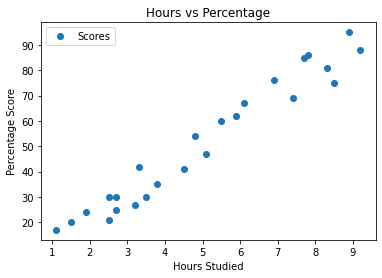

In [3]:
from matplotlib import style
#style.use('dark_background')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Data preparation

In [4]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2,
                                              random_state=0)

Training

In [5]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot regression line

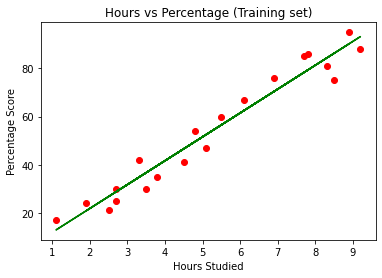

In [6]:
line= lr.coef_*x+lr.intercept_
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title('Hours vs Percentage (Training set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Predictions

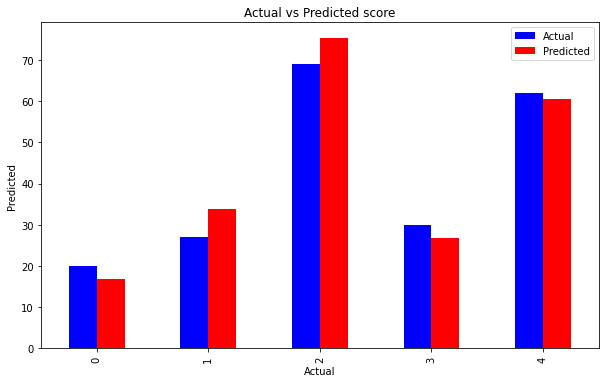

No of Hours = 8.5
Predicted Score = 86.25874012689371


In [8]:
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar', figsize=(10,6), color=["blue", "red"])
plt.title('Actual vs Predicted score')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.legend(["Actual", "Predicted"])
plt.show()
hours = 8.5
own_pred = lr.predict([[8.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Model Evaluation

In [9]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
